<a href="https://colab.research.google.com/github/aakanshajagga14/Plant-Disease-Detector/blob/main/Plant_Disease_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install roboflow

### Setting the GPU for better image proccessing

In [ ]:
!nvidia-smi

Fri Jun 16 17:56:25 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   68C    P8    12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### Let's test the model

[Errno 2] No such file or directory: '{HOME}'
/content


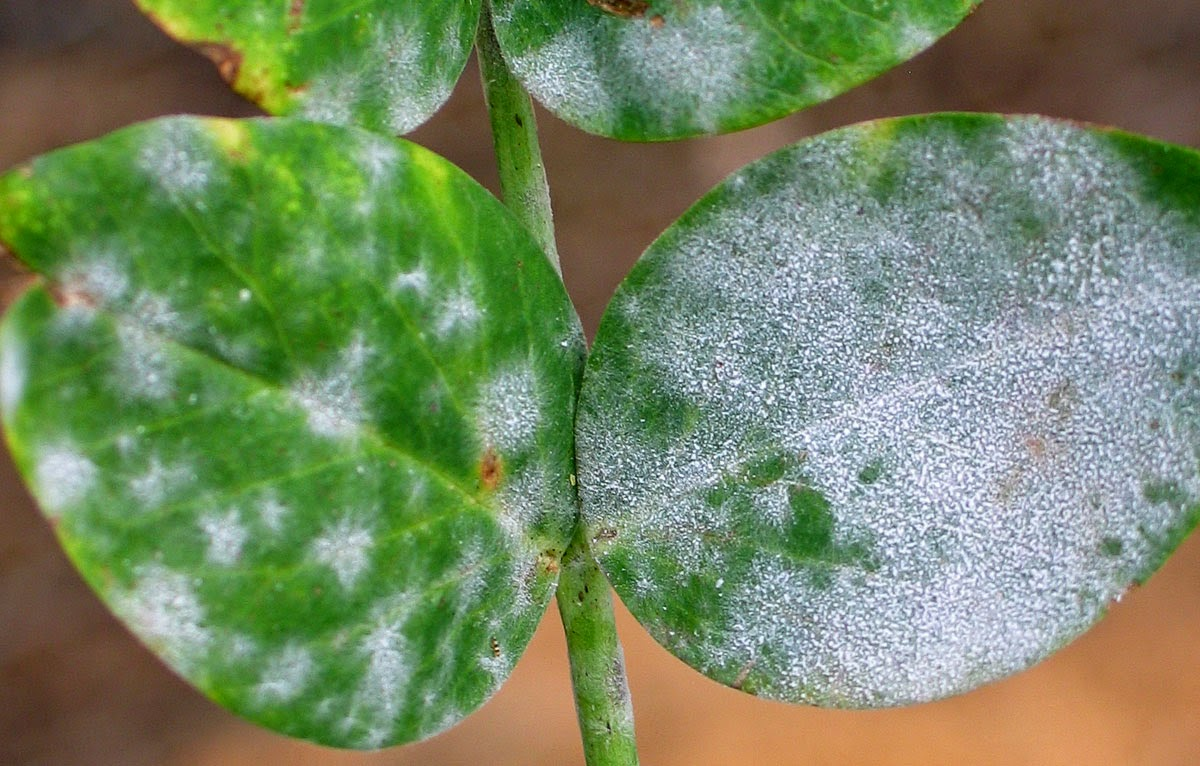

In [ ]:
%cd {HOME}
Image(filename='/content/sample.jpeg', height=300)

loading Roboflow workspace...
loading Roboflow project...
{'predictions': [{'x': 861, 'y': 436, 'width': 676, 'height': 598, 'confidence': 0.507369875907898, 'class': 'Powdery leaf', 'image_path': '/content/sample.jpeg', 'prediction_type': 'ObjectDetectionModel'}, {'x': 757, 'y': 62, 'width': 521, 'height': 124, 'confidence': 0.14297354221343994, 'class': 'Powdery leaf', 'image_path': '/content/sample.jpeg', 'prediction_type': 'ObjectDetectionModel'}, {'x': 699, 'y': 59, 'width': 412, 'height': 118, 'confidence': 0.10492566227912903, 'class': 'Rust Leaf', 'image_path': '/content/sample.jpeg', 'prediction_type': 'ObjectDetectionModel'}, {'x': 378, 'y': 431, 'width': 738, 'height': 597, 'confidence': 0.0629042387008667, 'class': 'Powdery leaf', 'image_path': '/content/sample.jpeg', 'prediction_type': 'ObjectDetectionModel'}, {'x': 266, 'y': 63, 'width': 453, 'height': 126, 'confidence': 0.012851446866989136, 'class': 'Rust Leaf', 'image_path': '/content/sample.jpeg', 'prediction_type': '

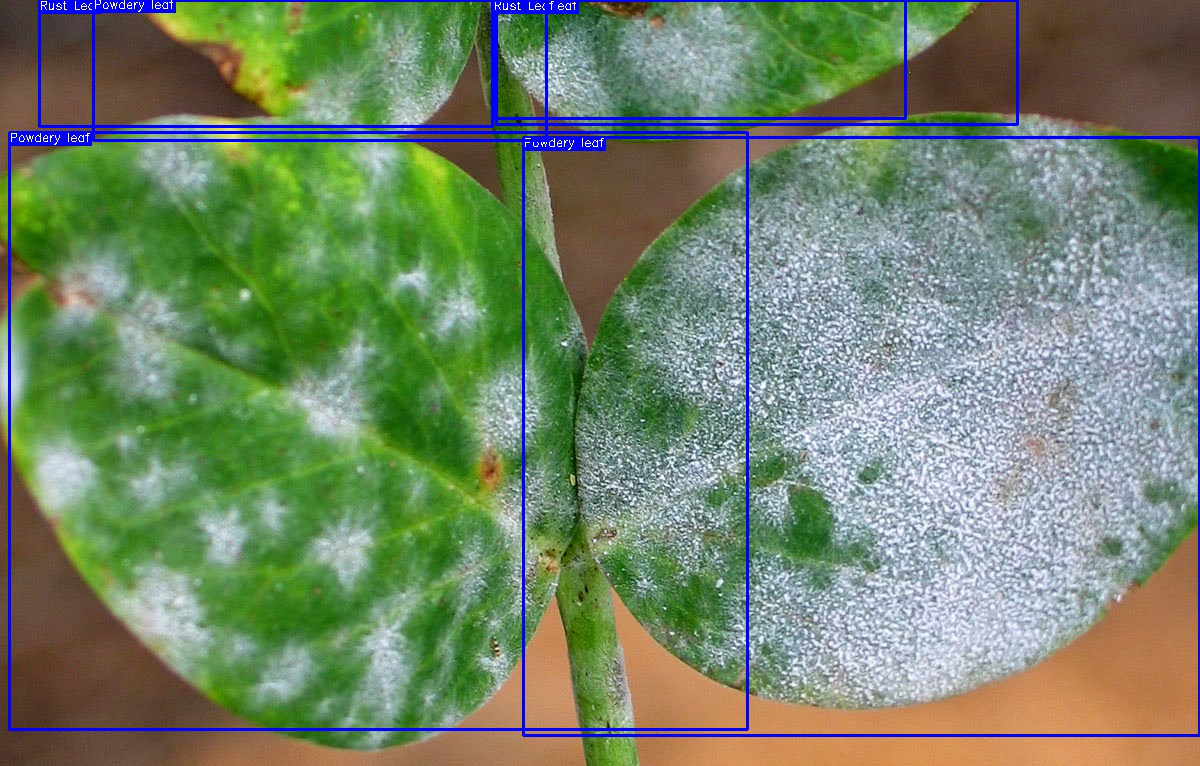

{'predictions': [{'x': 861.5, 'y': 437.0, 'width': 677.0, 'height': 598.0, 'confidence': 0.5099914073944092, 'class': 'Powdery leaf', 'image_path': 'https://th.bing.com/th/id/R.dd478c95eb8dada4c76f7b0451287009?rik=eJOg92aO3YDCXQ&riu=http%3a%2f%2f4.bp.blogspot.com%2f-WzgR-SB8wig%2fVPPAiuf925I%2fAAAAAAAABD8%2fNSbcgA63_tc%2fs1600%2fPowdery-Mildew-cornell.jpg&ehk=qEpLxeAbodbv7qkyjrB5iUJsstp3eABGx1wCq%2f2CuBk%3d&risl=&pid=ImgRaw&r=0', 'prediction_type': 'ObjectDetectionModel'}], 'image': {'width': '0', 'height': '0'}}


In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="4hcMhArALJwWNtDdJ5DF")
project = rf.workspace().project("plant-disease-detector")
model = project.version(1).model

# infer on a local image
print(model.predict("/content/sample.jpeg", confidence=1, overlap=40).json())

# visualize your prediction
model.predict("/content/sample.jpeg", confidence=1, overlap=40).save("prediction.jpg")
from PIL import Image
img = Image.open("/content/prediction.jpg")
img.show()

# infer on an image/video hosted elsewhere
print(model.predict("https://th.bing.com/th/id/R.dd478c95eb8dada4c76f7b0451287009?rik=eJOg92aO3YDCXQ&riu=http%3a%2f%2f4.bp.blogspot.com%2f-WzgR-SB8wig%2fVPPAiuf925I%2fAAAAAAAABD8%2fNSbcgA63_tc%2fs1600%2fPowdery-Mildew-cornell.jpg&ehk=qEpLxeAbodbv7qkyjrB5iUJsstp3eABGx1wCq%2f2CuBk%3d&risl=&pid=ImgRaw&r=0", hosted=True, confidence=16, overlap=30).json())
